VISUALIZATION OF HYPERPARAMETER TUNING RESULTS

In [3]:
import json 
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

***WEBNLG


In [6]:
!cd WEBNLG/webnlg_gridsearch && ls

Instances_list Subclasses_KG  entities_list  reification


In [41]:
def get_df_scores(filename):
    name = filename.split('/')[1]
    names=os.listdir(filename)
    if 'stories_withInput.json'  in names:
        names.remove('stories_withInput.json')
    names.remove('runs')
    blues={}
    bertscores={}
    meteors={}
    bleurts={}
    df_list=[]
    for n in names:
        #print(n)
        with open(filename+n,'r') as f:
            scores = json.load(f)
            vals=n.split('_output_')[0]
            #print(vals)        #print(scores[1])
            blues[vals]=scores[1+2]['bleu']
            bertscores[vals]=scores[4+2]['Bert_Score']['f1']
            meteors[vals]=scores[3+2]['meteor']
            bleurts[vals]=scores[5+2]['bleurt_score']
            
            df_list.append((vals,scores[1+2]['bleu'],scores[4+2]['Bert_Score']['f1'],scores[3+2]['meteor'],scores[5+2]['bleurt_score']))
        

    df = pd.DataFrame(df_list, columns=['vals', 'bleu', 'bertscore(f1)','meteor','bleurt'])
    df = df.sort_values(by='bertscore(f1)', ascending=False).head(5)
    plt.plot(df['vals'], df['bleu'],label='bleu',marker='o')
    plt.plot(df['vals'], df['bertscore(f1)'],label='bertscore(f1)',marker='o')
    plt.plot(df['vals'], df['meteor'],label='meteor',marker='o')
    plt.plot(df['vals'], df['bleurt'],label='bleurt',marker='o')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(color='grey', linestyle=':', linewidth=0.5)
    yticks = np.arange(0, 1, 0.05)
    plt.yticks(yticks)
    plt.title(f'{name}: Top 5 scores for each metric in {filename.split("/")[-2]}')
    plt.show()

def get_df_scores_OLD(filename):
    names=os.listdir(filename)
    blues={}
    bertscores={}
    meteors={}
    bleurts={}
    df_list=[]
    for n in names:
        #print(n)
        with open(filename+n,'r') as f:
            scores = json.load(f)
            vals=n.split('_output_')[0]
            #print(vals)        #print(scores[1])
            blues[vals]=scores[1]['bleu']
            bertscores[vals]=scores[4]['Bert_Score']['f1']
            meteors[vals]=scores[3]['meteor']
            bleurts[vals]=scores[5]['bleurt_score']
            
            df_list.append((vals,scores[1]['bleu'],scores[4]['Bert_Score']['f1'],scores[3]['meteor'],scores[5]['bleurt_score']))
        

    df = pd.DataFrame(df_list, columns=['vals', 'bleu', 'bertscore(f1)','meteor','bleurt'])
    df = df.sort_values(by='bertscore(f1)', ascending=False).head(5)
    plt.plot(df['vals'], df['bleu'],label='bleu',marker='o')
    plt.plot(df['vals'], df['bertscore(f1)'],label='bertscore(f1)',marker='o')
    plt.plot(df['vals'], df['meteor'],label='meteor',marker='o')
    plt.plot(df['vals'], df['bleurt'],label='bleurt',marker='o')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(color='grey', linestyle=':', linewidth=0.5)
    yticks = np.arange(0, 1, 0.05)
    plt.yticks(yticks)
    plt.title(f'WEBNLG: Top 5 scores for each metric in {filename.split("/")[-2]}')
    plt.show()



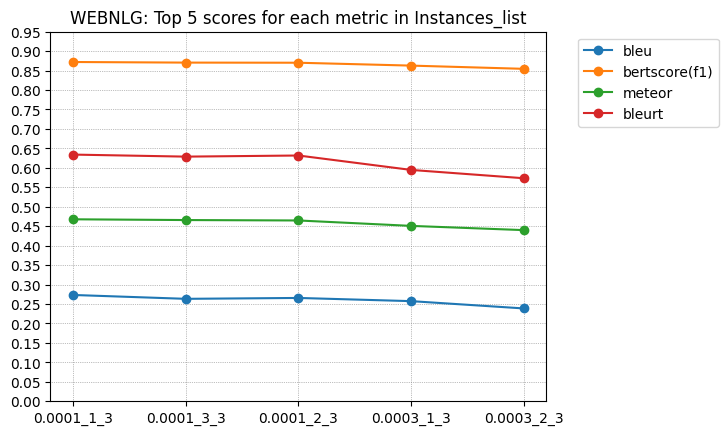

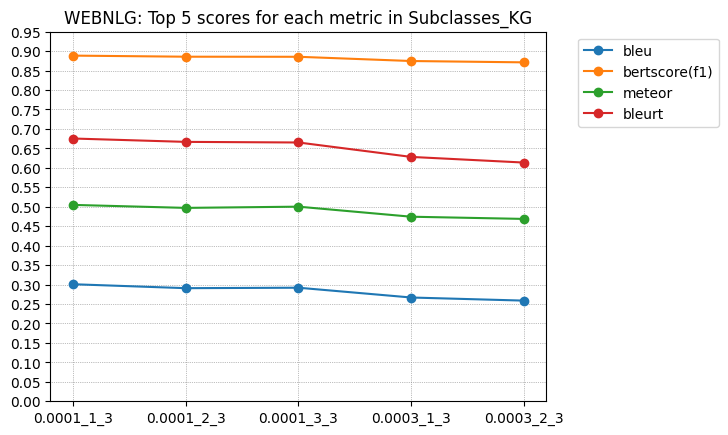

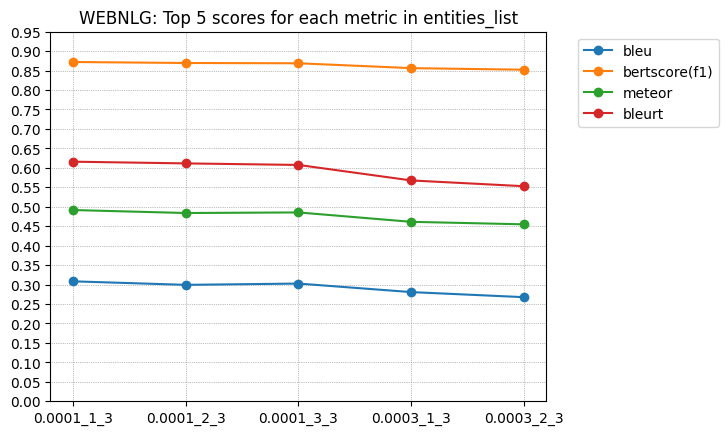

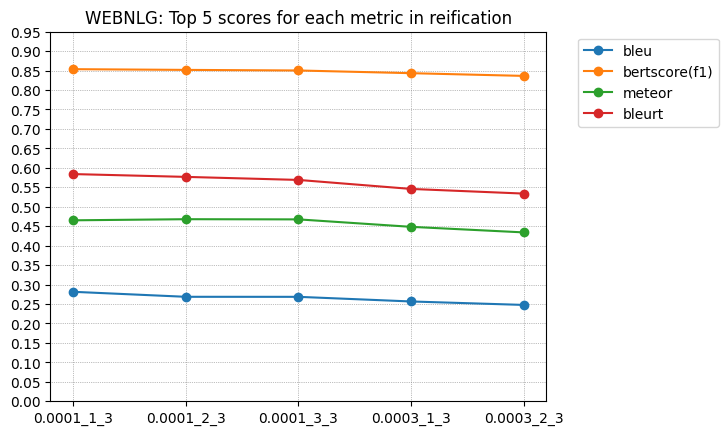

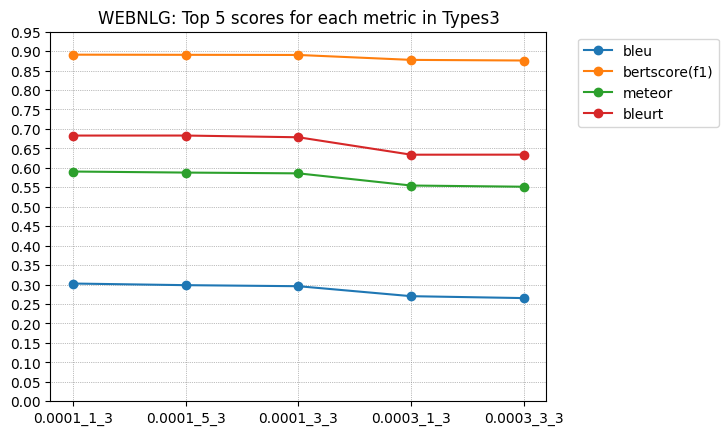

In [42]:
l = ['Instances_list', 'Subclasses_KG', 'entities_list', 'reification']
import os
for i in l:
    folder_path = f'WEBNLG/webnlg_gridsearch/{i}'

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # Process the file
            with open(file_path, 'r') as file:
                data = file.read()
            if '][' in data:
                first_section, second_section = data.split("][", 1)

                # Remove the second section's brackets and parse the remaining JSON data
                first_section_data = json.loads(first_section.strip() + "]")

                # Save the first section to a new file
                with open(file_path, "w") as file:
                    json.dump(first_section_data, file, indent=4)
for i in l:
    
    get_df_scores(f'./WEBNLG/webnlg_gridsearch/{i}/')
get_df_scores_OLD('./WEBNLG/webnlg_gridsearch/Types3/')

CREATE OVERLEAF TABLE

In [21]:
with open('./WEBNLG/final_results/Instance_list/output_metrics.json', 'r') as f:
    data = json.load(f)

table = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\nTypeKG & BLEU & BertScore (F1) & Meteor & Bleurt \\\\ \\hline\n"

for item in data:
    if 'typeKG' in item:
        typeKG = item['typeKG']
    if 'bleu' in item:
        bleu = item['bleu']
    if 'Bert_Score' in item:
        bert_score = item['Bert_Score']['f1']
    if 'meteor' in item:
        meteor = item['meteor']
    if 'bleurt_score' in item:
        bleurt = item['bleurt_score']

table += f"{typeKG} & {bleu:.2f} & {bert_score:.2f} & {meteor:.2f} & {bleurt:.2f} \\\\ \\hline\n"
table += "\\end{tabular}\n\\caption{Results}\n\\end{table}"

print(table)

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
TypeKG & BLEU & BertScore (F1) & Meteor & Bleurt \\ \hline
Instances_list & 0.27 & 0.87 & 0.47 & 0.63 \\ \hline
\end{tabular}
\caption{Results}
\end{table}


DWIE DATASET

In [28]:
!cd DWIE/DWIE_results/gridsearch_results && ls

Instances_KG     Subclasses_KG    entities_list
Instances_list   Types_KG         semantic_of_news


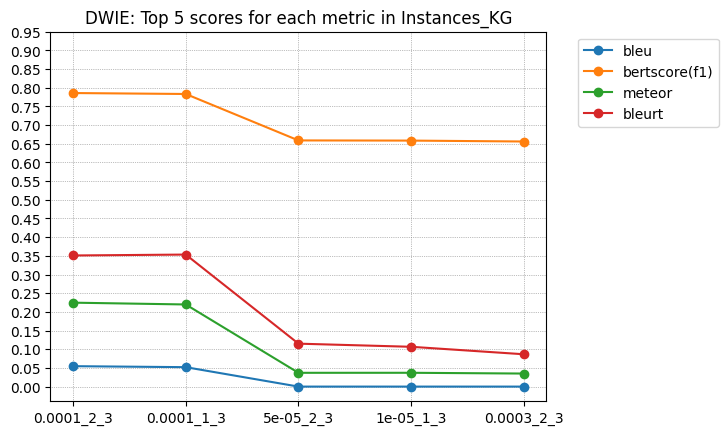

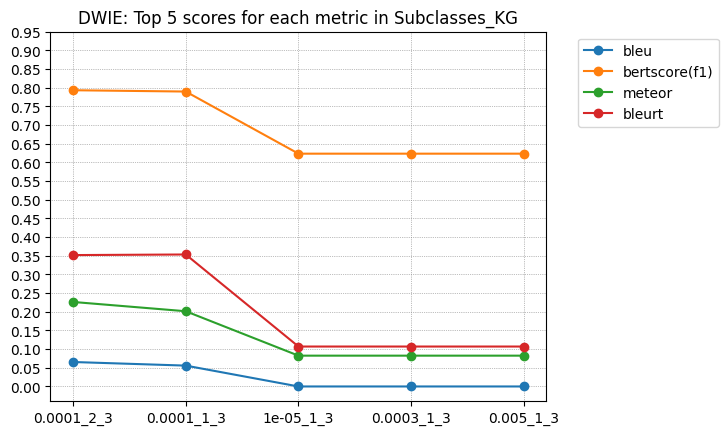

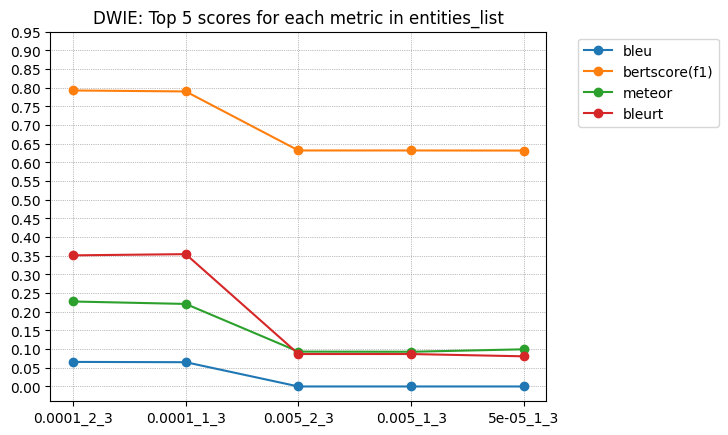

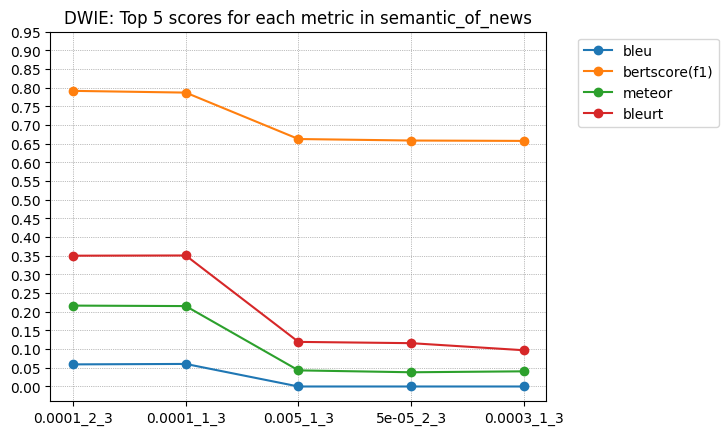

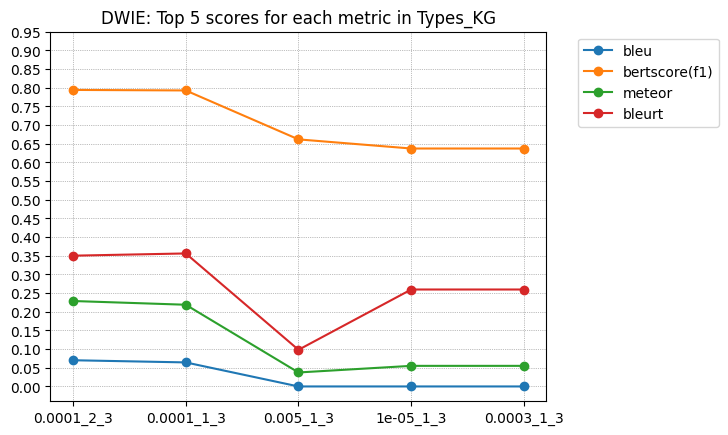

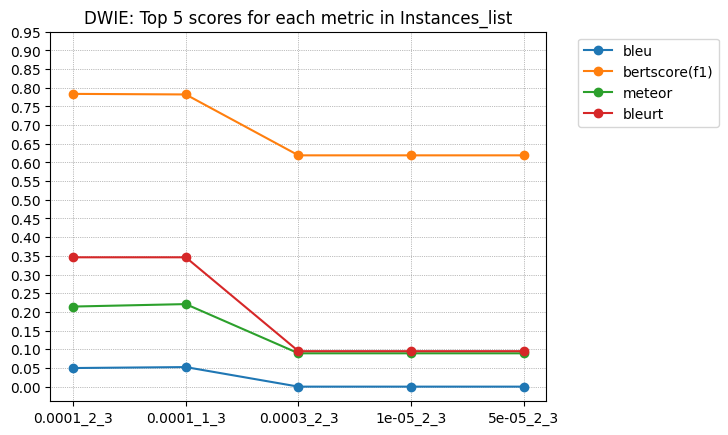

In [43]:
#Instances_KG     Subclasses_KG    entities_list
#Instances_list   Types_KG         semantic_of_news
l = ['Instances_KG', 'Subclasses_KG', 'entities_list', 'semantic_of_news', 'Types_KG', 'Instances_list']
import os
for i in l:
    folder_path = f'./DWIE/DWIE_results/gridsearch_results/{i}'

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # Process the file
            with open(file_path, 'r') as file:
                data = file.read()
            if '][' in data:
                first_section, second_section = data.split("][", 1)

                # Remove the second section's brackets and parse the remaining JSON data
                first_section_data = json.loads(first_section.strip() + "]")

                # Save the first section to a new file
                with open(file_path, "w") as file:
                    json.dump(first_section_data, file, indent=4)
for i in l:
    
    get_df_scores(f'./DWIE/DWIE_results/gridsearch_results/{i}/')